Para verificar la exactitud de sus cuentas financieras, las empresas emplean regularmente auditores para verificar asientos de contabilidad. Los empleados de la compañía hacen asientos erróneos 5% de las veces. Suponga que un auditor verifica al azar tres asientos.


Encuentre la distribución de probabilidad para Y, el número de errores detectados por el auditor.

In [1]:
import math
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
n = 3 #Numero de asisentos a verificar.
p = 0.05 #Probabilidad de que un empleado haga un asiento erroneo.

#Calculamos las combinaciones:
def nCr(n, r):
  return math.factorial(n) // (math.factorial(r)* math.factorial(n-r))

#Calculamos la distribucion Binomial:
distribucion = {}
for k in range(0, n+1):
  prob = nCr(n, k)*(p**k)*((1-p)**(n-k))
  distribucion[k] = prob

Distribucion de probabilidad para Y: 
Y (numero de errores) | Probabilidad P(Y)
--------------------- | ------------------
                    0 | 0.857375
                    1 | 0.135375
                    2 | 0.007125
                    3 | 0.000125


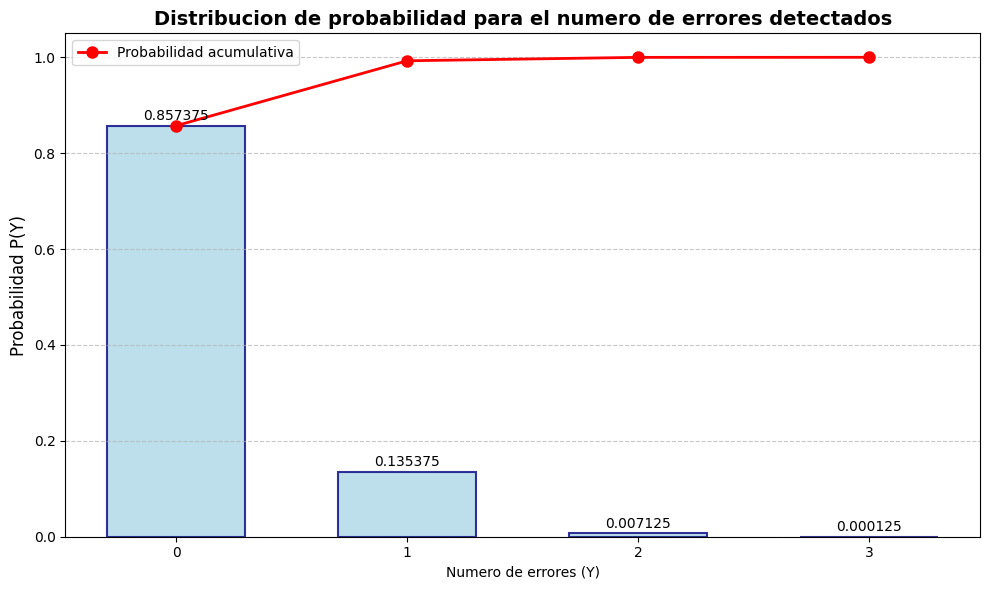


Estadisticas: 
Valor esperado E(Y) = 0.1500
Varianza Var(Y) = 0.142500
DeSviacion estandar σ = 0.377492


In [3]:
print('Distribucion de probabilidad para Y: ')
print('Y (numero de errores) | Probabilidad P(Y)')
print('--------------------- | ------------------')
for y, prob in distribucion.items():
  print(f'{y:21} | {prob:.6f}')


#Histograma:
plt.figure(figsize=(10,6))
bars = plt.bar(distribucion.keys(), distribucion.values(),
               color = 'lightblue', edgecolor='navy', linewidth=1.5,
               width=0.6, alpha=0.8)
plt.xlabel('Numero de errores (Y)')
plt.ylabel('Probabilidad P(Y)', fontsize=12)
plt.title('Distribucion de probabilidad para el numero de errores detectados',
          fontsize=14, fontweight='bold')
plt.xticks([0,1,2,3])
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar, prob in zip(bars, distribucion.values()):
  height=bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
           f'{prob:.6f}', ha='center', va='bottom', fontsize=10)



cumulative_probs = [sum(list(distribucion.values())[:i+1]) for i in range(len(distribucion))]
plt.plot(distribucion.keys(), cumulative_probs, 'ro-', linewidth=2,
         markersize=8, label = 'Probabilidad acumulativa')
plt.legend()
plt.tight_layout()
plt.show()

print(f'\nEstadisticas: ')
print(f'Valor esperado E(Y) = {n*p:.4f}')
print(f'Varianza Var(Y) = {n*p*(1-p):.6f}')
print(f'DeSviacion estandar σ = {(n * p * (1 - p)) ** 0.5:.6f}')

# **2**

Una agencia de rentas, que alquila equipo pesado por día, ha encontrado que, en promedio, se renta una costosa máquina sólo un día de cada cinco. Si la renta en un día es independiente de la renta en cualquier otro día, encuentre la distribución de probabilidad de Y, el número de días entre un par de rentas.

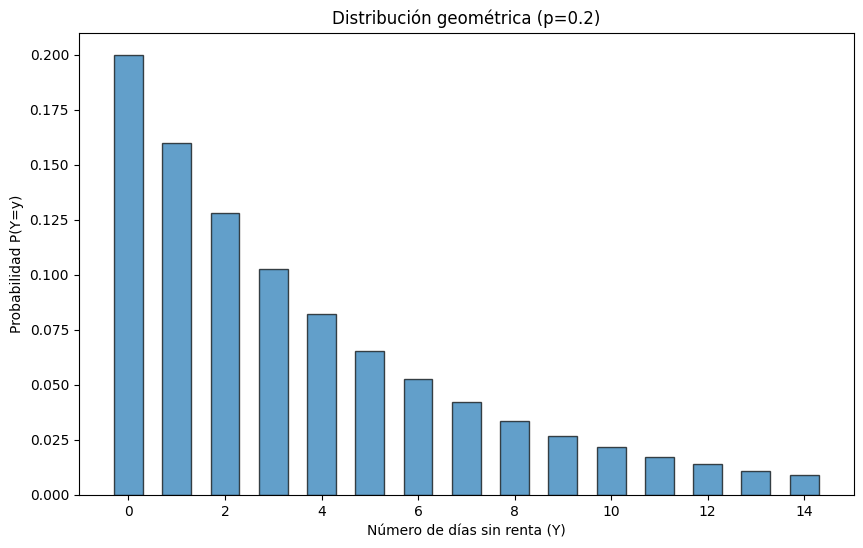

In [11]:
p = 0.2
f = 1 - p

dias = list(range(0, 15))  # Probamos una serie de valores para los dias sin renta

# Distribucion geometrica:
probs = [(f**y) * p for y in dias]

# Almacenamos los valores en un dataframe:
df = pd.DataFrame({"Y": y_vals, "P(Y=y)": probs})

#Histograma:
plt.figure(figsize=(10, 6))
plt.bar(y_vals, probs, width=0.6, alpha=0.7, edgecolor="black")
plt.xlabel("Número de días sin renta (Y)")
plt.ylabel("Probabilidad P(Y=y)")
plt.title("Distribución geométrica (p=0.2)")
plt.show()
#

In [9]:
p = 0.2
f = 1 - p

#Calculamos la distribucion geometrica:
geom = {}
for k in range(0, 15):
  prob = (f**k) * p
  geom[k] = prob

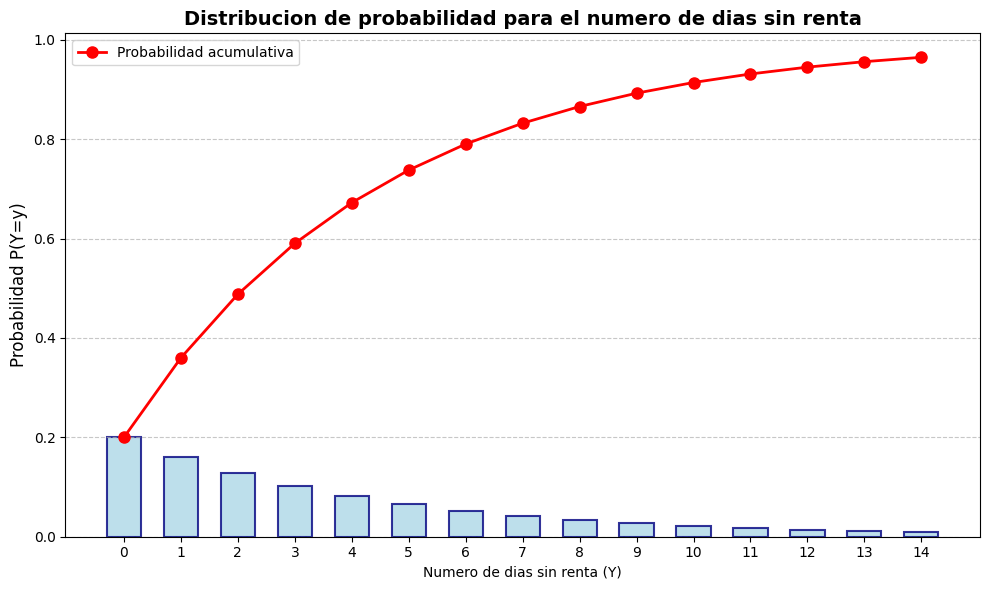

In [12]:
plt.figure(figsize=(10,6))
bars = plt.bar(geom.keys(), geom.values(),
               color = 'lightblue', edgecolor='navy', linewidth=1.5,
               width=0.6, alpha=0.8)
plt.xlabel('Numero de dias sin renta (Y)')
plt.ylabel('Probabilidad P(Y=y)', fontsize=12)
plt.title('Distribucion de probabilidad para el numero de dias sin renta',
          fontsize=14, fontweight='bold')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.grid(axis='y', linestyle='--', alpha=0.7)



prob_acumulada = [sum(list(geom.values())[:i+1]) for i in range(len(geom))]
plt.plot(geom.keys(), prob_acumulada, 'ro-', linewidth=2,
         markersize=8, label = 'Probabilidad acumulativa')
plt.legend()
plt.tight_layout()
plt.show()

# **3**

Las personas que entran a un banco de sangre son tales que 1 de cada 3 tienen tipo de sangre O+ y 1 de cada 15 tienen sangre tipo O–. Considere tres donantes seleccionados al azar para el banco de sangre. Denote con X el número de donadores con sangre tipo O+ y denote con Y el número con sangre tipo O–.
Encuentre las distribuciones de probabilidad para X y Y. También encuentre la distribución de probabilidad para X + Y, el número de donadores que tienen tipo de sangre O.

In [8]:
from scipy.stats import binom

n = 3 #tres donadores
promas = 1/3
promenos = 1/15
pro = promas + promenos


k_values = [0,1,2,3] #Varoles de la distribucion

#Distribucion para X:
pmfX = binom.pmf(k, n, promas)

#Distribucion para Y:
pmfY = binom.pmf(k, n, promenos)

#Distribucion para X+Y:
pmfO = binom.pmf(k, n, pro)


print('Distribuciones de probabilidad: ')
print('\n X, numero de donantes con O+: ')
print('k\tP(X=k)')
for k, prob in zip(k_values, pmfX):
  print(f'{k}\t{prob:.6f}')


print('\n   Para Y, numero de donantes con O-')
print('k\tP(Y=k)')
for k, prob in zip(k_values, pmfY):
  print(f'{k}\t{prob:.6f}')


print('\n  Para X+Y, numero de donantes con sangre tipo O')
print('k\tP(X+Y=k)')
for k, prob, in zip(k_values, pmfO):
  print(f'{k}\t{prob:.6f}')

Distribuciones de probabilidad: 

 X, numero de donantes con O+: 
k	P(X=k)
0	0.296296
1	0.444444
2	0.222222
3	0.037037

   Para Y, numero de donantes con O-
k	P(Y=k)
0	0.813037
1	0.174222
2	0.012444
3	0.000296

  Para X+Y, numero de donantes con sangre tipo O
k	P(X+Y=k)
0	0.216000
1	0.432000
2	0.288000
3	0.064000
